In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath =  '/content/drive/MyDrive/Colab/file/total_review_tokens.csv'

In [ ]:
import io
import pandas as pd

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df

,product_name,rating,skin_type,review,tokens,label
0,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,제품은 정말 사용해보시라고 추천드리고싶어요진짜 좋은 제품이거든요사춘기때 여...,"['제품', '정말', '사용', '추천', '드리', '진짜', '좋', '제품'...",1
1,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,간단정리 자극없이 무난함 봄여름가을에 적당한 수분감 겨...,"['정리', '자극', '없이', '봄여름', '수분감', '겨울', '겹', '레...",1
2,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,나의 피부상태 복합성 트러블 조금만 자극적이면 피부 뒤집어짐 장점 여드름...,"['피부', '상태', '복합성', '조금', '자극', '뒤집', '장점', '짜...",1
3,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,지성,또 샀어요 진짜 닥터지 최고입니다 건성분들이 쓰시기에는 너무 빨리 날아가...,"['사', '진짜', '최고', '건성', '쓰', '너무', '빨리', '날아가'...",1
4,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,닥터지 크림은 워낙 유명하기도 하고 성분이 순하고 진정효과가 좋아서 꾸준히 구매해왔...,"['워낙', '하', '성분', '순하', '진정효과', '꾸준히', '구매', '...",1
...,...,...,...,...,...,...
92460,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,최애 입니다이제 이것만 쓸거예요또사러 가야지 눈누난나 신난다,"['애', '입', '쓰', '가', '눈', '신나']",1
92461,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,자극이 없고 일단은 너무 촉촉해서 좋아요 이것만 쓰게 될것같아,"['자극', '없', '일단', '너무', '좋', '쓰', '되', '같']",1
92462,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,배송도 빠르고 세일할 때 사야할거 같아서 샀어요송악크림 건성한테 정말 좋을거같아요,"['배송', '빠르', '세일', '때', '사', '같', '사', '요', '건...",1
92463,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,가벼운제형이고 끈적거리지 않아서 좋았어요 그리고 진정에도 좋습니다,"['가볍', '끈적거리', '좋', '진정', '좋']",1


In [ ]:
df_=df.loc[df['label']!=-1] #별점값이 4였던 값들 제외

In [ ]:
df_=df_.reset_index(drop=True)

In [ ]:
df_['label'].value_counts()

1    73532
0     5150
Name: label, dtype: int64

In [ ]:
df_ = df_.loc[:,["tokens","label"]]

In [ ]:
from ast import literal_eval

In [ ]:
df_['tokens'] = df_['tokens'].apply(literal_eval)

### TF-IDF

In [ ]:
from gensim import corpora, models

In [ ]:
below = len(df_)//100

In [ ]:
dictionary = corpora.Dictionary(df_['tokens'])
dictionary.filter_extremes(no_below=below)
bow_corpus = [dictionary.doc2bow(text) for text in df_['tokens']]
        
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
len_dic = len(dictionary)
data_size = len(corpus_tfidf)

print(len_dic, data_size)

464 78682


In [ ]:
feature_list = [[0]*len_dic for i in range(data_size)] #len(dictionary)*len(data)

In [ ]:
for i in range(data_size):
    for j in corpus_tfidf[i]:
        feature_list[i][j[0]] = j[1]

In [ ]:
label = df_['label'].values.tolist()

### UnderSampling

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 9.5 MB/s 
     |████████████████████████████████| 199 kB 51.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_list, label, test_size=0.3, random_state=123)

In [ ]:
nearmiss = NearMiss()
under_X, under_y = nearmiss.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(under_y))

Counter({1: 51467, 0: 3610})
Counter({0: 3610, 1: 3610})


### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
model =  LogisticRegression(penalty="elasticnet", solver="saga")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio" :[ .1, .5, .7, .9, .95, .99, 1]}
# define search
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='f1')
# perform the search
results = grid_search.fit(under_X, under_y)

# summarize
print('best_score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

best_score: 0.841
Config: {'C': 10, 'l1_ratio': 0.1}


In [ ]:
import joblib
joblib.dump(results.best_estimator_, '/content/drive/MyDrive/Colab/file/total_lr_model.pkl')

['/content/drive/MyDrive/Colab/file/total_lr_model.pkl']

### best_estimator_불러오기

In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab/file/total_lr_model.pkl')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [ ]:
print('model.coef_.sum():',loaded_model.coef_.sum())
print('model.intercept_:',loaded_model.intercept_)

pred_y = loaded_model.predict(X_test)
print('r2_score: ',r2_score(y_test,pred_y))
print('mse: ', mean_squared_error(y_test,pred_y))
print('accuracy: ', accuracy_score(y_test, pred_y))

model.coef_.sum(): -643.8290105333579
model.intercept_: [2.73946144]
r2_score:  -9.693769882960911
mse:  0.6521499682270705
accuracy:  0.34785003177292945


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tr_pred_y = loaded_model.predict(under_X)
cm_tr = confusion_matrix(under_y,tr_pred_y)

Text(33.0, 0.5, 'Actual')

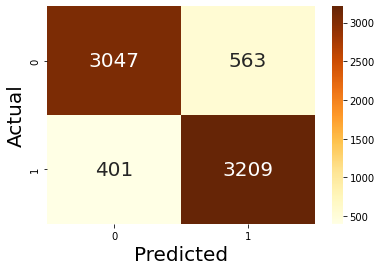

In [ ]:
sns.heatmap(cm_tr, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [ ]:
cm_te = confusion_matrix(y_test, pred_y)

Text(33.0, 0.5, 'Actual')

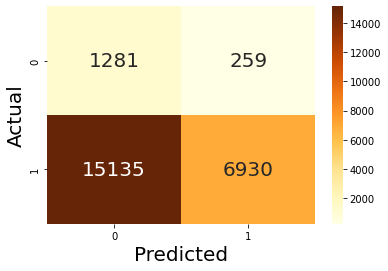

In [ ]:
sns.heatmap(cm_te, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

### 단어 극성 확인

In [ ]:
feature_zip = []

In [ ]:
for idx, val in enumerate(loaded_model.coef_[0]):
    feature_zip.append((idx, val))

In [ ]:
feature_zip_sorted = sorted(feature_zip, key = lambda item: item[1])

In [ ]:
feature_zip_sorted

[(309, -5.331048659495696),
 (179, -5.16640567811523),
 (432, -5.103435572585856),
 (18, -4.97399165225194),
 (369, -4.372540827324737),
 (88, -4.330508037574228),
 (33, -4.244184361741941),
 (233, -4.236374359693221),
 (312, -4.170683944875502),
 (147, -4.161230529076095),
 (291, -3.9822794160093085),
 (259, -3.946636478887055),
 (98, -3.8966531880708684),
 (364, -3.818021565602524),
 (210, -3.8160811700563064),
 (442, -3.7990998459456513),
 (42, -3.790043873753001),
 (456, -3.741812214255826),
 (143, -3.7351677537911914),
 (246, -3.7256086141438822),
 (226, -3.7184958796820293),
 (305, -3.6965483916688684),
 (187, -3.6702150689960478),
 (154, -3.650878452832757),
 (321, -3.615008287913772),
 (248, -3.6138314893148347),
 (95, -3.609165749613218),
 (264, -3.592070813274053),
 (425, -3.513881857766068),
 (258, -3.5091248282092673),
 (137, -3.4870360721534537),
 (97, -3.481846713374573),
 (238, -3.481234729013495),
 (4, -3.4477573046374457),
 (133, -3.4230139268504347),
 (398, -3.4132507

In [ ]:
dict_sorted_li = []

In [ ]:
for ft in feature_zip_sorted:
  dict_sorted_li.append((dictionary[ft[0]],ft[1]))

### 긍정

In [ ]:
sorted(dict_sorted_li[-50:],key = lambda item: item[1],reverse=True)

[('뉴', 5.06642026335758),
 ('세안', 4.683272199020857),
 ('강추', 3.910521409804151),
 ('득', 3.6421723790573273),
 ('쑥', 3.3154784369162527),
 ('굿', 3.1709861031661655),
 ('관리', 2.819258390809796),
 ('챙기', 2.778627853425792),
 ('가히', 2.7188631823328007),
 ('젤크림', 2.7036936757038394),
 ('싹', 2.600933251282944),
 ('맞추', 2.5170891800056414),
 ('동생', 2.001150115376385),
 ('잘', 1.9329672495948624),
 ('정착', 1.858439289354748),
 ('아이', 1.6710019762532091),
 ('엄마', 1.5969151740734517),
 ('피부', 1.508211026938934),
 ('과', 1.5028008392766754),
 ('없이', 1.4359842572334147),
 ('단계', 1.2608246062654063),
 ('재생크림', 1.258892496281198),
 ('집', 1.1899586636066477),
 ('단점', 1.133645346657752),
 ('선물', 1.0476280725115994),
 ('확실히', 1.0352058989035113),
 ('딱', 0.9707233315812618),
 ('만족', 0.9648632898989264),
 ('물론', 0.903421727116303),
 ('쭉', 0.8949715986338975),
 ('진짜', 0.7976477665224331),
 ('빠르', 0.7891133404523699),
 ('선크림', 0.785145864726832),
 ('체험단', 0.7692027984971563),
 ('너무', 0.7588964504472987),
 ('

###부정

In [ ]:
dict_sorted_li[:50]

[('바뀌', -5.331048659495696),
 ('손', -5.16640567811523),
 ('자체', -5.103435572585856),
 ('덧바르', -4.97399165225194),
 ('절대', -4.372540827324737),
 ('상태', -4.330508037574228),
 ('묽', -4.244184361741941),
 ('채우', -4.236374359693221),
 ('불편', -4.170683944875502),
 ('그렇', -4.161230529076095),
 ('살짝', -3.9822794160093085),
 ('해보', -3.946636478887055),
 ('올리', -3.8966531880708684),
 ('개인', -3.818021565602524),
 ('소량', -3.8160811700563064),
 ('일반', -3.7990998459456513),
 ('성분', -3.790043873753001),
 ('아무래도', -3.741812214255826),
 ('클렌징', -3.7351677537911914),
 ('피부장벽', -3.7256086141438822),
 ('밀리', -3.7184958796820293),
 ('걸', -3.6965483916688684),
 ('진정효과', -3.6702150689960478),
 ('느끼', -3.650878452832757),
 ('치', -3.615008287913772),
 ('굉장히', -3.6138314893148347),
 ('아쉽', -3.609165749613218),
 ('별로', -3.592070813274053),
 ('끼', -3.513881857766068),
 ('편안', -3.5091248282092673),
 ('장점', -3.4870360721534537),
 ('올라오', -3.481846713374573),
 ('보통', -3.481234729013495),
 ('거의', -3.4477573046374457)